# Project 2: Prediction of medical decision: classification and regression

**Author: Chenwei Xiao**

**Date: 2020/5**

**Tasks:**
* Subtask1: Classification of whether patients need medical tests based on patient information and primary test results;
* Subtask2: Classification of the occurence of sepsis based on patient information and primary test results;
* Subtask3: Regression of key vital signs including LABEL_RRate, LABEL_ABPm, LABEL_SpO2, LABEL_Heartrate.

In [1]:
## IPython Commands
%matplotlib inline
# IPython modules
from IPython.display import display

# General math and plotting modules.
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
# General Setting for pd
pd.set_option('display.max_columns', 100) # Setting pandas to display a N number of columns
pd.set_option('display.max_rows', 10) # Setting pandas to display a N number rows
pd.set_option('display.width', 1000) # Setting pandas dataframe display width to N

# Automated EDA: General first visualization for dataset
import pandas_profiling
from autoviz.AutoViz_Class import AutoViz_Class
import sweetviz as sv

# Machine Learning library. 
import sklearn
from sklearn.impute import SimpleImputer
from sklearn import preprocessing
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV
from sklearn import svm
from sklearn.metrics import auc
from sklearn.metrics import plot_roc_curve
from sklearn.metrics import roc_auc_score,mean_squared_error, r2_score

import warnings
warnings.filterwarnings('ignore')

Imported AutoViz_Class version: 0.0.68. Call using: 
    from autoviz.AutoViz_Class import AutoViz_Class
    AV = AutoViz_Class()
    AutoViz(filename, sep=',', depVar='', dfte=None, header=0, verbose=0,
                            lowess=False,chart_format='svg',max_rows_analyzed=150000,max_cols_analyzed=30)
            
To remove previous versions, perform 'pip uninstall autoviz'


In [2]:
## Load data
train_features = pd.read_csv('train_features.csv')
train_labels = pd.read_csv('train_labels.csv')
print(train_features.shape)
print(train_labels.shape)

(227940, 37)
(18995, 16)


In [3]:
## An overview of dataset
display(train_features.head(10))

pid  Time   Age  EtCO2  PTT   BUN  Lactate  Temp  Hgb  HCO3  BaseExcess  RRate  Fibrinogen  Phosphate  WBC  Creatinine  PaCO2  AST  FiO2  Platelets  SaO2  Glucose  ABPm  Magnesium  Potassium  ABPd  Calcium  Alkalinephos   SpO2  Bilirubin_direct  Chloride   Hct  Heartrate  Bilirubin_total  TroponinI   ABPs    pH
0    1     3  34.0    NaN  NaN  12.0      NaN  36.0  8.7  24.0        -2.0   16.0         NaN        NaN  6.3         NaN   45.0  NaN   NaN        NaN   NaN      NaN  84.0        1.2        3.8  61.0      NaN           NaN  100.0               NaN     114.0  24.6       94.0              NaN        NaN  142.0  7.33
1    1     4  34.0    NaN  NaN   NaN      NaN  36.0  NaN   NaN        -2.0   16.0         NaN        NaN  NaN         NaN    NaN  NaN   0.5        NaN   NaN      NaN  81.0        NaN        NaN  62.5      NaN           NaN  100.0               NaN       NaN   NaN       99.0              NaN        NaN  125.0  7.33
2    1     5  34.0    NaN  NaN   NaN      NaN  36.0  NaN   NaN         0.0   18.0         NaN        NaN  NaN         NaN   43.0  NaN   0.4        NaN   NaN      NaN  74.0        NaN        NaN  59.0      NaN           NaN  100.0               NaN       NaN   NaN       92.0              NaN        NaN  110.0  7.37
3    1     6  34.0    NaN  NaN   NaN      NaN  37.0  NaN   NaN         0.0   18.0         NaN        NaN  NaN         NaN    NaN  NaN   NaN        NaN   NaN      NaN  66.0        NaN        NaN  49.5      NaN           NaN  100.0               NaN       NaN   NaN       88.0              NaN        NaN  104.0  7.37
4    1     7  34.0    NaN  NaN   NaN      NaN   NaN  NaN   NaN         NaN   18.0         NaN        NaN  NaN         NaN    NaN  NaN   NaN        NaN   NaN      NaN  63.0        1.8        NaN  48.0      NaN           NaN  100.0               NaN       NaN  22.4       81.0              NaN        NaN  100.0  7.41
5    1     8  34.0    NaN  NaN   NaN      NaN  37.0  NaN   NaN         NaN   16.0         NaN        NaN  NaN         NaN    NaN  NaN   0.4        NaN   NaN      NaN  68.0        1.8        NaN  51.0      NaN           NaN  100.0               NaN       NaN  22.4       82.0              NaN        NaN  106.0   NaN
6    1     9  34.0    NaN  NaN   NaN      NaN  37.0  NaN   NaN         NaN   18.0         NaN        NaN  NaN         NaN    NaN  NaN   NaN        NaN   NaN      NaN  65.0        NaN        NaN  46.0      NaN           NaN  100.0               NaN       NaN   NaN       67.0              NaN        NaN  112.0   NaN
7    1    10  34.0    NaN  NaN   NaN      NaN  37.0  NaN   NaN         NaN   18.0         NaN        NaN  NaN         NaN    NaN  NaN   NaN        NaN   NaN      NaN  68.0        NaN        NaN  47.0      NaN           NaN  100.0               NaN       NaN   NaN       62.0              NaN        NaN  121.0   NaN
8    1    11  34.0    NaN  NaN  12.0      NaN   NaN  8.5  26.0         NaN   12.0         NaN        4.6  4.7         0.5    NaN  NaN   NaN      143.0   NaN    120.0  67.0        2.1        4.1  47.0      7.6           NaN  100.0               NaN     111.0  23.8       58.0              NaN        NaN  118.0   NaN
9    1    12  34.0    NaN  NaN  12.0      NaN  38.0  8.5  26.0         0.0   18.0         NaN        NaN  4.7         NaN   42.0  NaN   0.4        NaN   NaN      NaN  62.0        2.1        4.1  44.0      NaN           NaN  100.0               NaN     111.0  23.8       66.0              NaN        NaN  110.0  7.39

In [4]:
display(train_labels.head(10))

pid  LABEL_BaseExcess  LABEL_Fibrinogen  LABEL_AST  LABEL_Alkalinephos  LABEL_Bilirubin_total  LABEL_Lactate  LABEL_TroponinI  LABEL_SaO2  LABEL_Bilirubin_direct  LABEL_EtCO2  LABEL_Sepsis  LABEL_RRate  LABEL_ABPm  LABEL_SpO2  LABEL_Heartrate
0      1               1.0               0.0        0.0                 0.0                    0.0            1.0              0.0         0.0                     0.0          0.0           0.0         12.1        85.4       100.0             59.9
1     10               0.0               0.0        0.0                 0.0                    0.0            0.0              0.0         0.0                     0.0          0.0           0.0         17.8       100.6        95.5             85.5
2    100               1.0               0.0        0.0                 0.0                    0.0            1.0              0.0         0.0                     0.0          0.0           0.0         16.5        88.3        96.5            108.1
3   1000               0.0               0.0        0.0                 0.0                    0.0            1.0              0.0         1.0                     0.0          1.0           0.0         19.4        77.2        98.3             80.9
4  10000               0.0               0.0        0.0                 0.0                    0.0            0.0              0.0         0.0                     0.0          0.0           0.0         12.6        76.8        97.7             95.3
5  10002               0.0               0.0        0.0                 0.0                    0.0            0.0              0.0         0.0                     0.0          0.0           0.0         14.5        67.4        99.1             64.6
6  10006               0.0               0.0        0.0                 0.0                    0.0            0.0              0.0         0.0                     0.0          0.0           0.0         17.2        84.9        96.8             90.5
7  10007               0.0               0.0        1.0                 1.0                    1.0            0.0              0.0         0.0                     0.0          0.0           1.0         23.8        97.0        94.3             76.0
8  10009               1.0               1.0        0.0                 0.0                    0.0            1.0              0.0         1.0                     0.0          0.0           0.0         18.9        72.0        95.3             91.5
9   1001               1.0               0.0        0.0                 0.0                    0.0            1.0              0.0         0.0                     0.0          0.0           0.0         14.9        83.3        99.9            117.3

In [9]:
report = pandas_profiling.ProfileReport(train_features)
report.to_file(output_file='report.html') ## too large to directly display(report)

In [7]:
report_label = pandas_profiling.ProfileReport(train_labels)
display(report_label)

Shape of your Data Set: (227940, 37)
Classifying variables in data set...
    37 Predictors classified...
        This does not include the Target column(s)
    22 variables removed since they were ID or low-information variables
Since Number of Rows in data 227940 exceeds maximum, randomly sampling 150000 rows for EDA...
Number of All Scatter Plots = 78
Could not draw Distribution Plot
Time to run AutoViz (in seconds) = 26.610


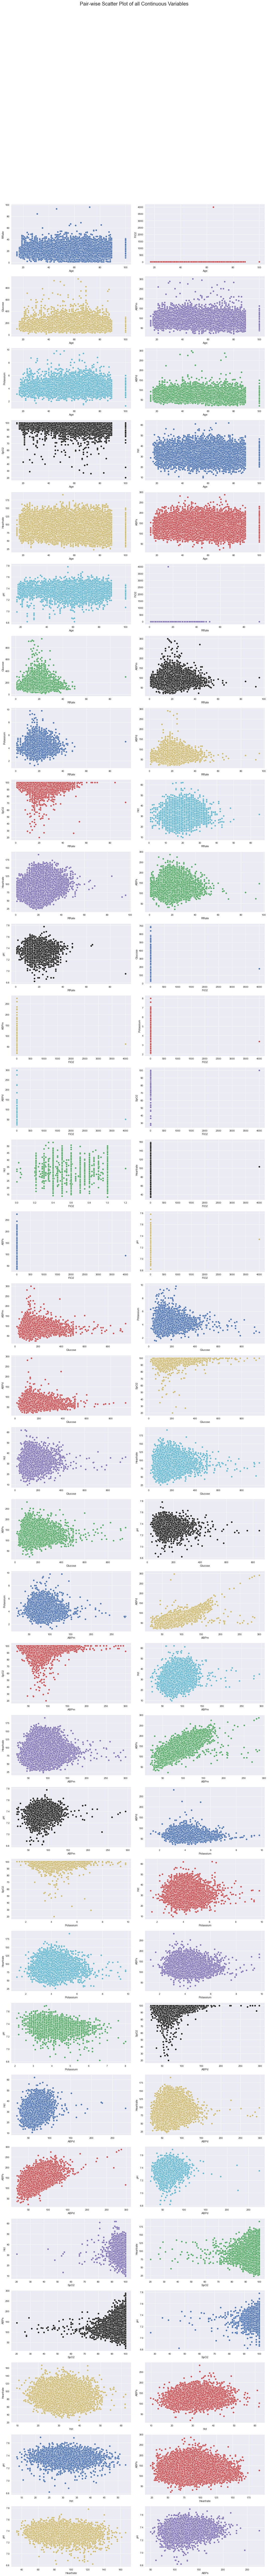

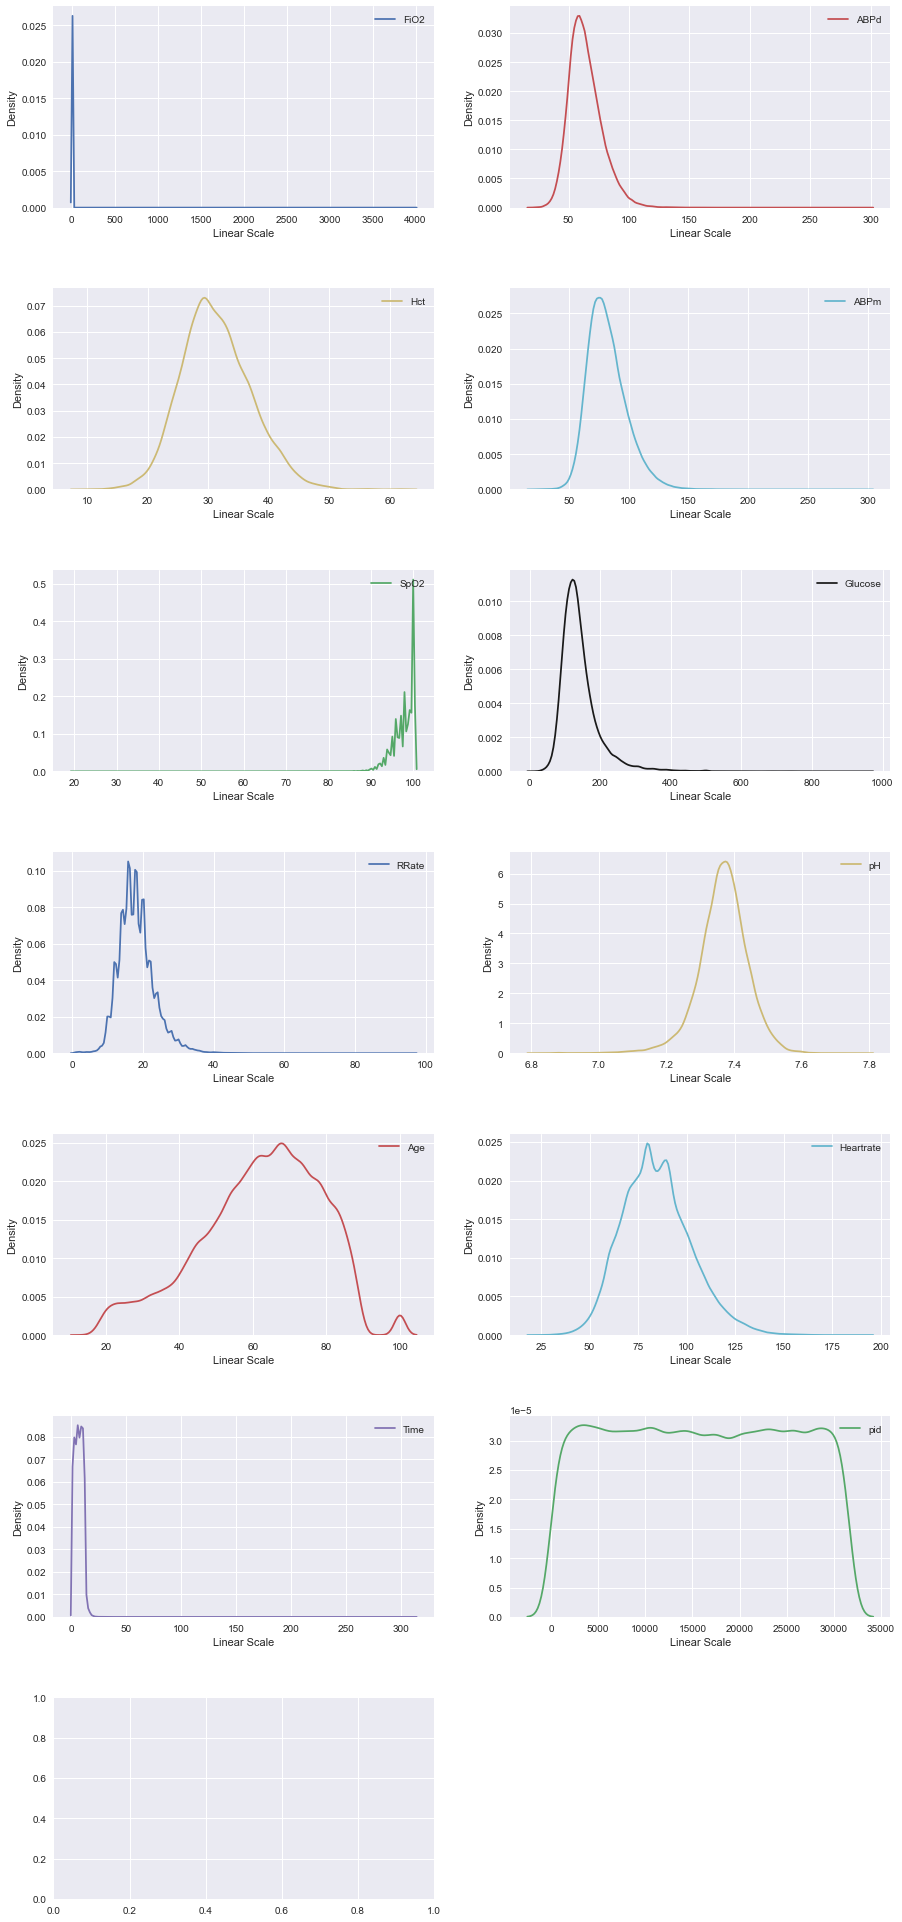

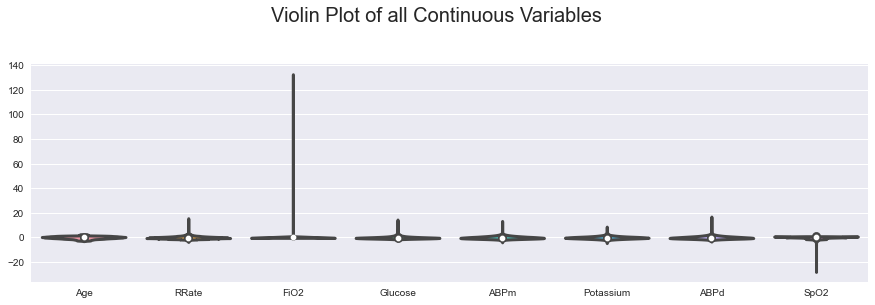

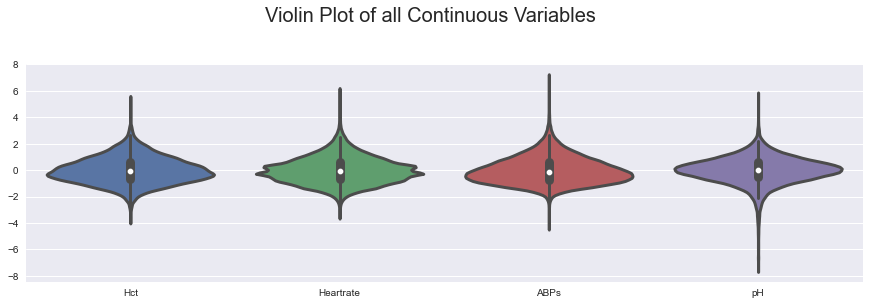

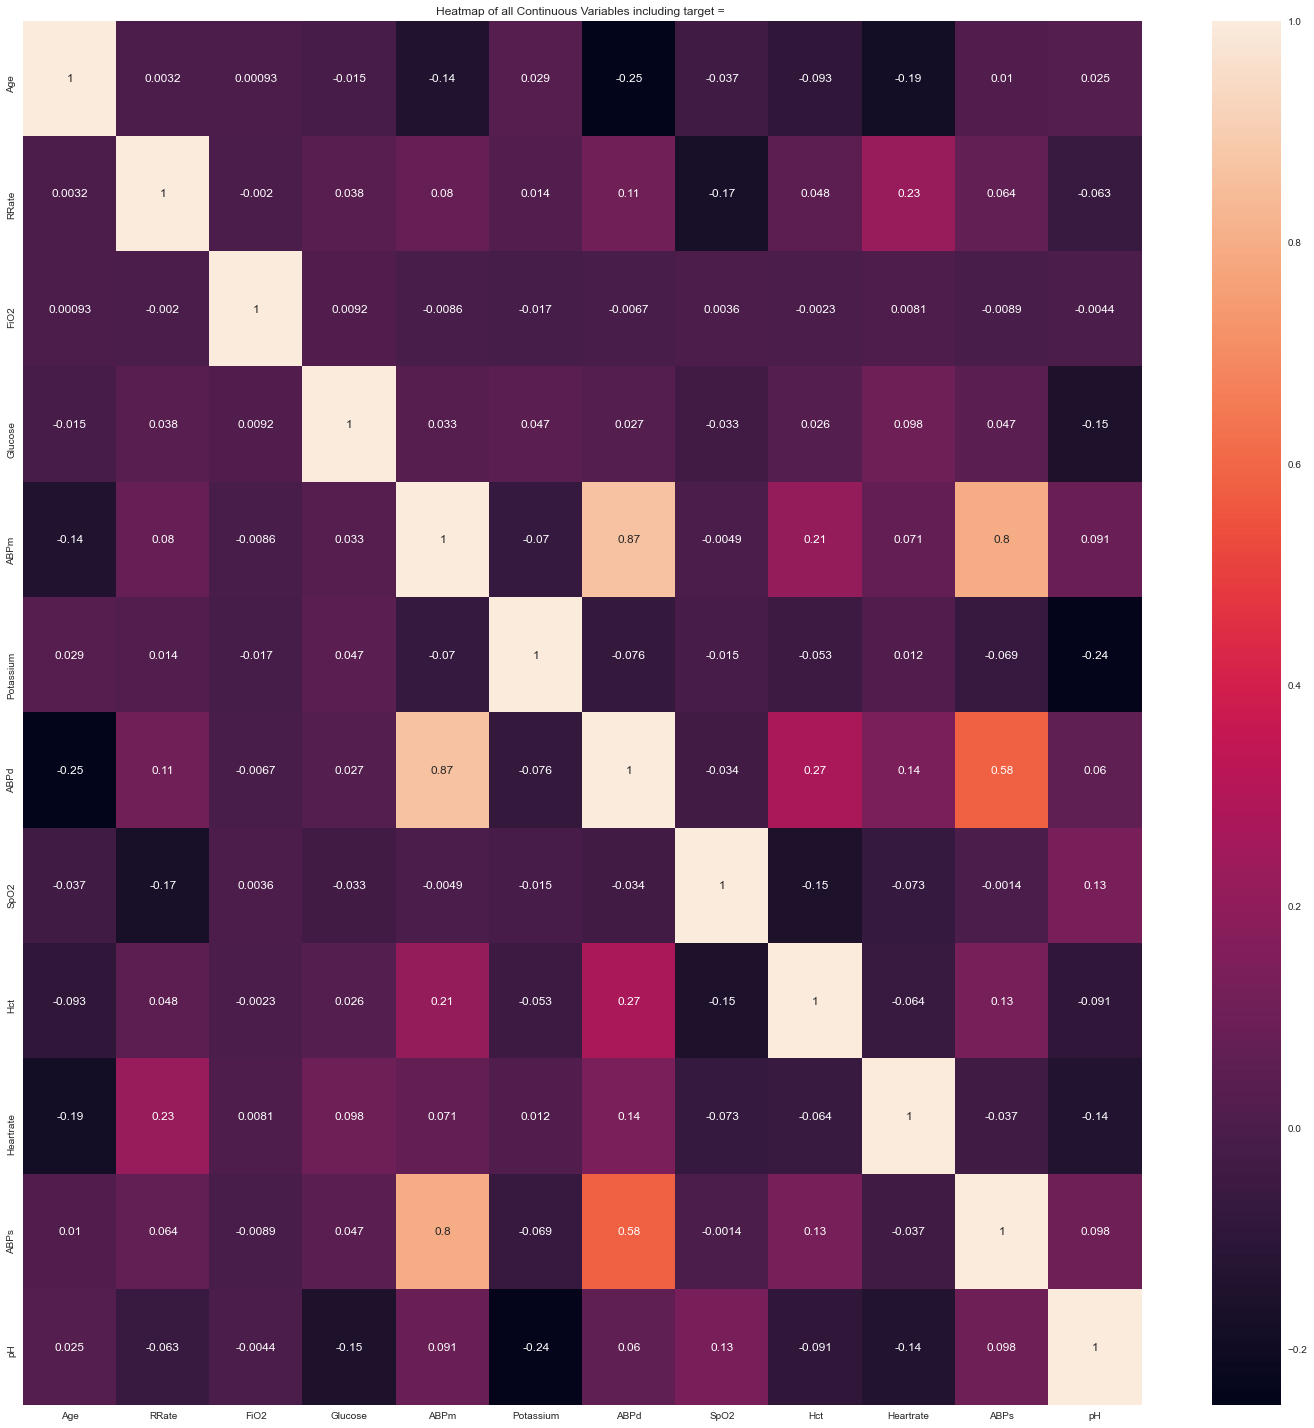

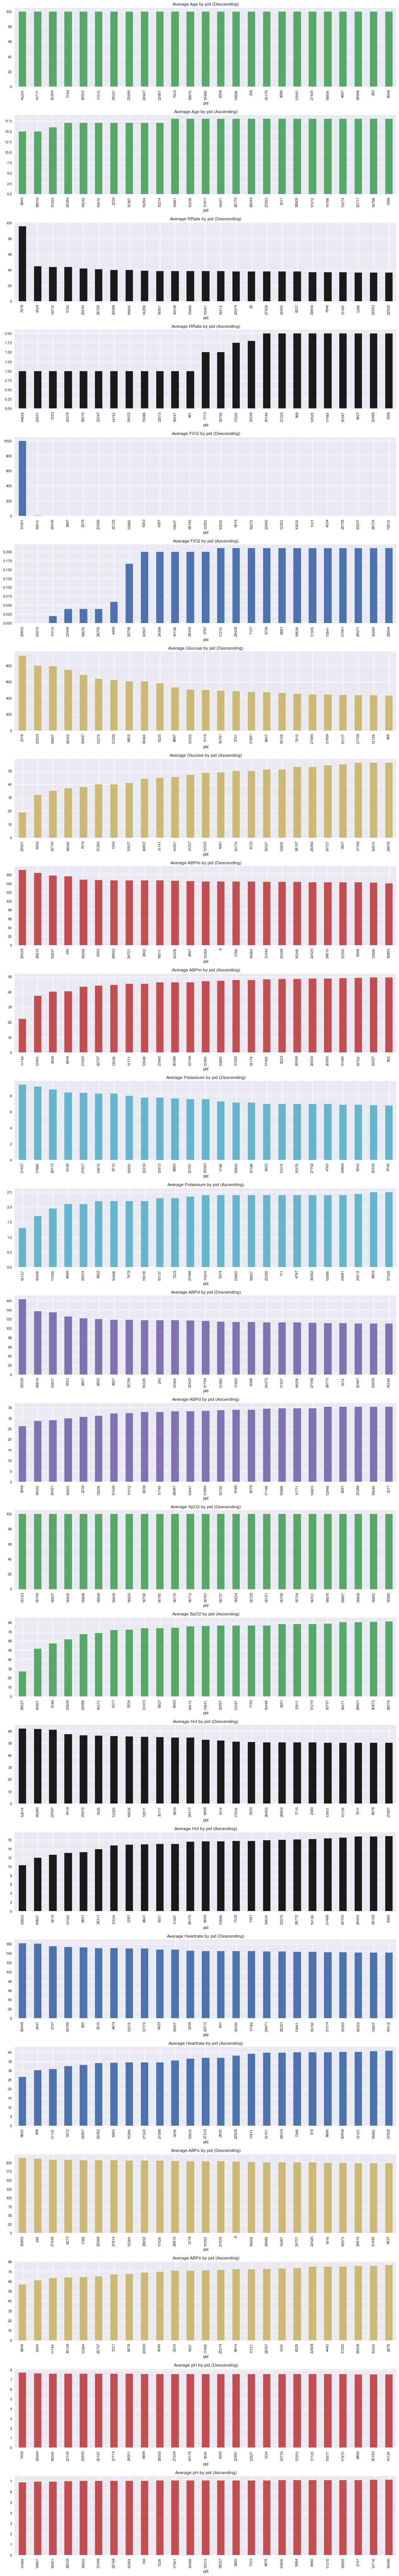

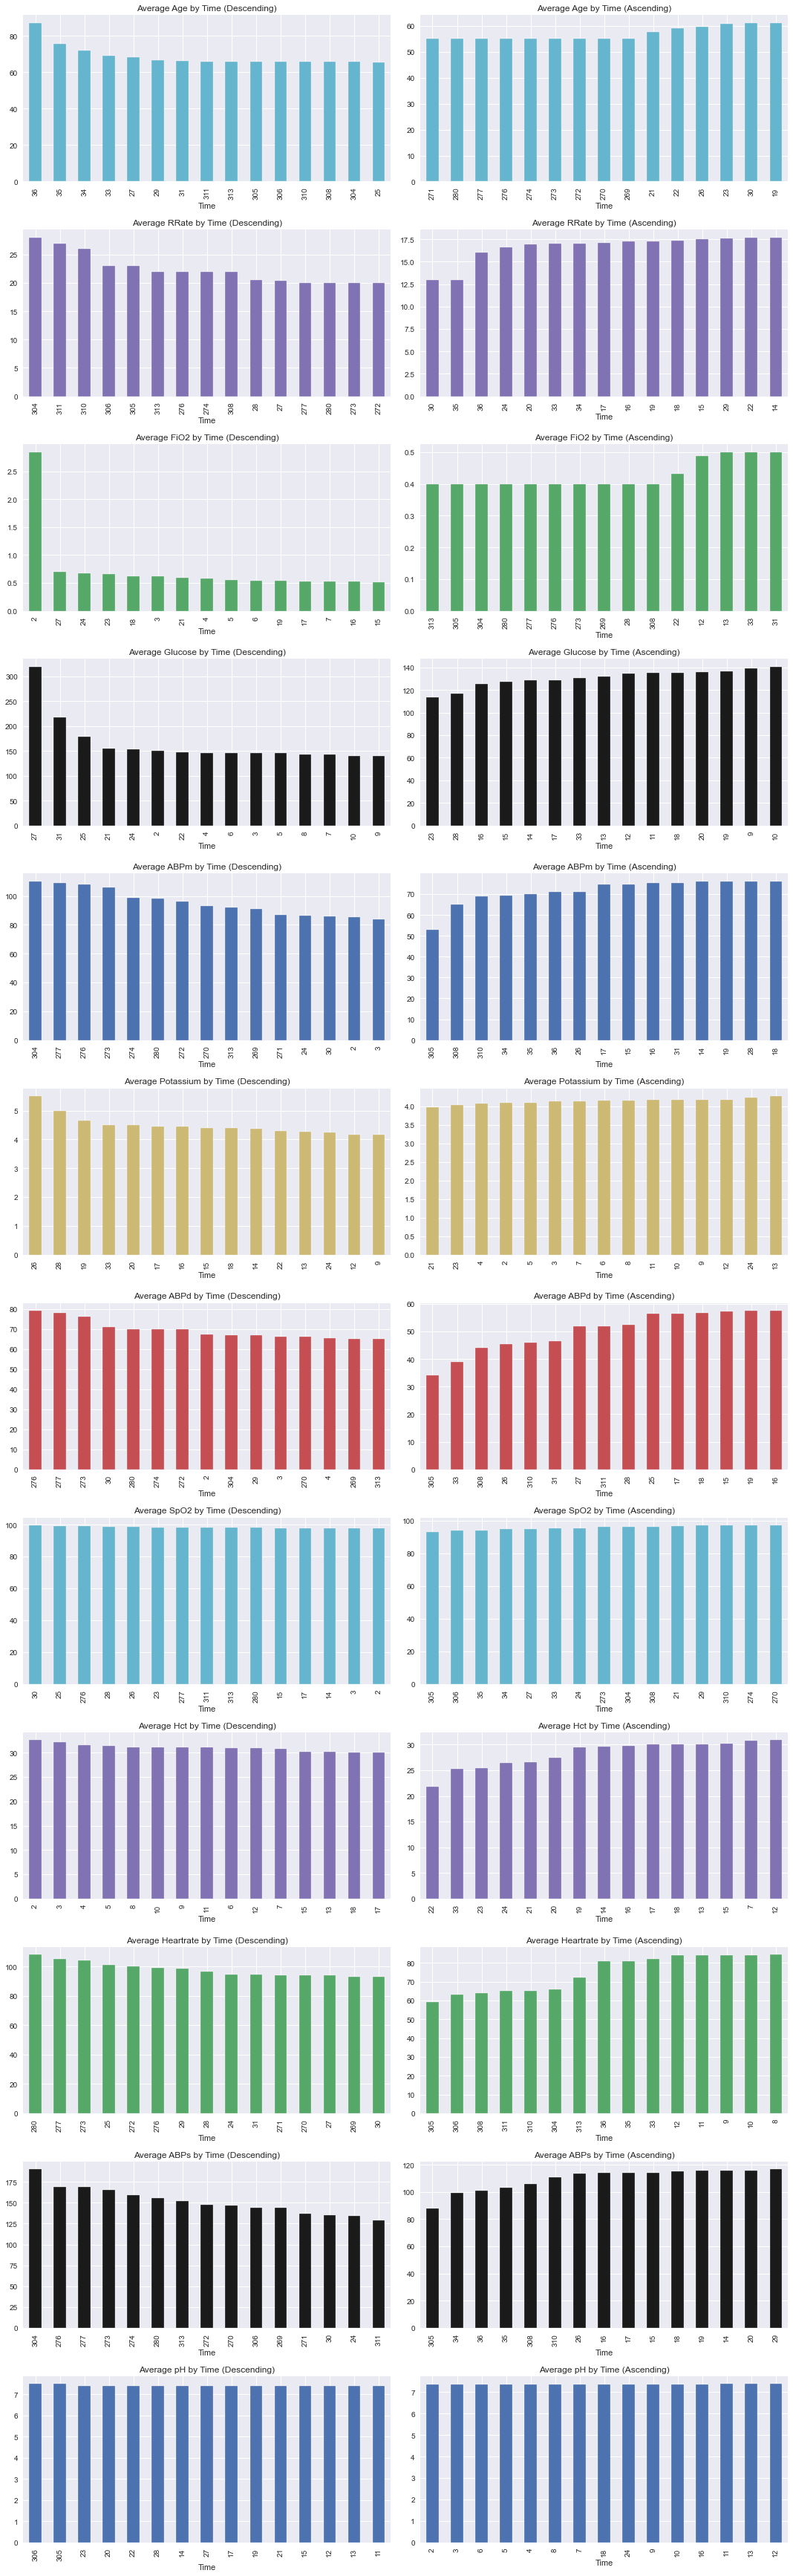

In [6]:
AV = AutoViz_Class()
# Let's now visualize the plots generated by AutoViz.
report_2 = AV.AutoViz('train_features.csv')

In [5]:
sweet_report = sv.analyze(train_features)
sweet_report.show_html('sweet_report.html')


Report sweet_report.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


## Pre-processing the training dataset
1. From the above EDA, the data is organized like this: There is 18995 patient records(distinct pid) and each patient has 12 records for different features for the first 12 hours entering the hospital.
2. Now we know that most of features are of highly missing rate (>90%) except for ABPs, Heartrate, SpO2, ABPd, ABPm, RRate, Temp and age.
3. We need to do some preprocessing to deal with the missing value and create and select informative features:

### First step
Last observed value in the 12 recorded hours for each channel (patient features) separately as features. If there was no observed value for a channel for 1 patient we impute this with the Mean value for that channel in the training set. The motivation of this is to provide the most accurate estimate of the patient state for that variable at the beginning of the forecasting horizon.

In [121]:
train_features_np = np.array(train_features)
train_features_np = train_features_np.reshape((int(train_features_np.shape[0]/12),12,train_features_np.shape[1]))
train_features_np.shape
train_features_np = train_features_np[:,:,2:] #pid and time not features
train_features_np.shape

(18995, 12, 35)

In [76]:
features_last = np.zeros((train_features_np.shape[0],train_features_np.shape[2]))
for k in range(train_features_np.shape[2]):
    for i in range(train_features_np.shape[0]):
        X = train_features_np[i,:,k] # for k_th feature of i_th patient a total of 12hrs: shape(12)
        if(np.isnan(X).sum()==12):
            features_last[i,k] = np.nan
        else:
            features_last[i,k] = X[np.isnan(X) == False][-1]

## do simple imputation with mean value for np.nan
imp_mean = SimpleImputer(missing_values=np.nan, strategy='mean')
features_last = imp_mean.fit_transform(features_last)
features_last.shape # 35 new features

### Second step
Number of observations for a channel in the first 12 recorded hours of the stay for each channel separately as features. The motivation of this is to use the fact that previous clinicians actions, such as ordering of tests, can be indicative for future events in some of the tasks.

In [122]:
train_features_np = train_features_np[:,:,1:]
train_features_np.shape

(18995, 12, 34)

In [123]:
features_n_obs = np.zeros((train_features_np.shape[0],train_features_np.shape[2])) # not include age as it is not a test
for k in range(train_features_np.shape[2]):
    for i in range(train_features_np.shape[0]):
        X = train_features_np[i,:,k] # for k_th feature of i_th patient a total of 12hrs: shape(12)
        features_n_obs[i,k] = (np.isnan(X) == False).sum()
features_n_obs.shape # 34 new features

(18995, 34)

### Third step
3 statistics (Median, Interquartile Range, Slope of regression line fit) on the imputed time series for each channel separately as features. Imputation was done using forward filling, with the edge cases of filling values with no previous observation, or all values if there was no observation for the patient in the first 12 recorded hours, with the mean value of that channel in the training data-set. The motivation for this is to capture the typical value, instability, trend of the patient, for each channel separately.

In [143]:
features_median = np.zeros((train_features_np.shape[0],train_features_np.shape[2]))
features_iqr = np.zeros_like(features_median)
features_slope = np.zeros_like(features_median)

median_na = train_features.iloc[:,3:].median()

In [144]:
for k in range(train_features_np.shape[2]):
    for i in range(train_features_np.shape[0]):
        X = train_features_np[i,:,k] # for k_th feature of i_th patient a total of 12hrs: shape(12)
        if(np.isnan(X).sum()==12):
            features_median[i,k] = median_na[k]
            features_iqr[i,k] = 0.
            features_slope[i,k] = 0.
        elif((np.isnan(X).sum()==11) & (np.isnan(X)[-1] == False)):
            features_median[i,k] = X[-1]
            features_iqr[i,k] = 0.
            features_slope[i,k] = 0.
        else:
            X = pd.Series(X).ffill()
            features_median[i,k] = X.median()
            features_iqr[i,k] = X.quantile(0.75) - X.quantile(0.25)
            x = X.dropna()
            features_slope[i,k] = stats.linregress(x.index, x)[0]
    print(k)

In [157]:
display(features_median[0,:])
display(features_iqr[0,:])
display(features_slope[0,:])

array([3.30e+01, 3.22e+01, 1.20e+01, 2.10e+00, 3.70e+01, 8.70e+00,
       2.40e+01, 0.00e+00, 1.80e+01, 2.33e+02, 4.60e+00, 6.30e+00,
       5.00e-01, 4.30e+01, 3.60e+01, 4.00e-01, 1.43e+02, 9.70e+01,
       1.20e+02, 6.75e+01, 1.80e+00, 3.80e+00, 4.85e+01, 7.60e+00,
       7.20e+01, 1.00e+02, 3.00e-01, 1.14e+02, 2.38e+01, 7.50e+01,
       8.00e-01, 1.50e-01, 1.11e+02, 7.39e+00])

array([ 0.  ,  0.  ,  0.  ,  0.  ,  0.5 ,  0.2 ,  2.  ,  0.  ,  2.  ,
        0.  ,  0.  ,  1.6 ,  0.  ,  0.25,  0.  ,  0.  ,  0.  ,  0.  ,
        0.  ,  5.75,  0.9 ,  0.3 ,  6.25,  0.  ,  0.  ,  0.  ,  0.  ,
        3.  ,  2.2 , 22.25,  0.  ,  0.  , 16.25,  0.04])

array([ 0.        ,  0.        ,  0.        ,  0.        ,  0.18881119,
       -0.02237762,  0.22377622,  0.13986014,  0.04195804,  0.        ,
        0.        , -0.17902098,  0.        , -0.23426573,  0.        ,
       -0.00454545,  0.        ,  0.        ,  0.        , -1.8041958 ,
        0.1006993 ,  0.03356643, -1.70979021,  0.        ,  0.        ,
        0.        ,  0.        , -0.33566434, -0.15104895, -3.38111888,
        0.        ,  0.        , -1.08391608,  0.00538462])

### Bind all the features

In [160]:
train_features_all = pd.concat([pd.DataFrame(features_last),
                                pd.DataFrame(features_n_obs),
                                pd.DataFrame(features_median),
                                pd.DataFrame(features_iqr),
                                pd.DataFrame(features_slope)],axis=1, sort=False)

In [163]:
display(train_features_all.shape)
display(train_features_all.head(10))

(18995, 171)

0          1          2          3         4     5          6         7         8     9           10        11         12        13         14          15        16          17         18     19     20        21        22    23        24         25     26        27         28         29     30        31        32     33        34    0    1    2    3     4    5    6    7     8    9    10   11   12   13   14  ...    18     19   20    21     22    23   24    25   26   27   28     29   30   31     32     33        0         1    2         3         4         5         6         7         8    9    10        11   12        13   14        15        16        17         18        19        20        21        22        23   24        25   26        27        28        29   30   31        32        33
0  34.0  32.921331  38.200755  12.000000  2.213149  38.0   8.500000  26.00000  0.000000  18.0  276.993699  4.600000   4.700000  0.500000  42.000000  159.335384  0.400000  143.000000  93.437982  120.0   53.0  2.100000  4.100000  39.0  7.600000  96.524136  100.0  1.158604  111.00000  22.200000   69.0  1.539493  6.729047  102.0  7.390000   0.0  0.0  3.0  0.0   8.0  3.0  3.0  6.0  12.0  0.0  1.0  3.0  1.0  3.0  0.0  ...   0.0   5.75  0.9  0.30   6.25  0.00  0.0  0.00  0.0  3.0  2.2  22.25  0.0  0.0  16.25  0.040  0.000000  0.000000  0.0  0.000000  0.188811 -0.022378  0.223776  0.139860  0.041958  0.0  0.0 -0.179021  0.0 -0.234266  0.0 -0.004545  0.000000  0.000000   0.000000 -1.804196  0.100699  0.033566 -1.709790  0.000000  0.0  0.000000  0.0 -0.335664 -0.151049 -3.381119  0.0  0.0 -1.083916  0.005385
1  71.0  32.921331  27.800000  12.000000  2.213149  36.0  14.600000  23.87804 -0.569098  16.0  276.993699  2.500000  11.500000  0.820000  40.442782   20.000000  0.491153  207.000000  93.437982  152.0  102.0  1.500000  3.200000  78.0  8.600000  68.000000   98.0  1.158604  105.91971  42.100000   75.0  1.300000  0.010000  136.0  7.383579   0.0  1.0  1.0  0.0   2.0  1.0  0.0  0.0  11.0  0.0  1.0  1.0  1.0  0.0  1.0  ...   0.0   9.50  0.0  0.00  14.00  0.00  0.0  1.00  0.0  0.0  0.0   8.00  0.0  0.0  11.50  0.000  0.000000  0.000000  0.0  0.000000  0.000000  0.000000  0.000000  0.000000 -0.863636  0.0  0.0  0.000000  0.0  0.000000  0.0  0.000000  0.000000  0.000000   0.000000 -0.418182  0.000000  0.000000 -1.036364  0.000000  0.0  0.045455  0.0  0.000000  0.000000 -1.036364  0.0  0.0 -0.981818  0.000000
2  68.0  32.921331  20.900000  21.000000  2.213149  38.0  12.500000  27.00000 -0.569098  13.0  276.993699  3.500000  12.500000  1.100000  40.442782  159.335384  0.491153  204.000000  93.437982  243.0   84.0  1.700000  3.600000  67.0  9.000000  96.524136   97.0  1.158604  101.00000  36.800000  113.0  1.539493  6.729047  116.0  7.383579   0.0  1.0  2.0  0.0   4.0  2.0  2.0  0.0  12.0  0.0  1.0  2.0  1.0  0.0  0.0  ...   0.0   6.50  0.0  0.00   5.00  0.00  0.0  1.75  0.0  0.0  0.0  23.50  0.0  0.0  15.75  0.000  0.000000  0.000000  0.0  0.000000  0.293706  0.000000  0.000000  0.000000  0.251748  0.0  0.0  0.000000  0.0  0.000000  0.0  0.000000  0.000000  0.000000   0.000000 -0.517483  0.000000  0.000000  0.132867  0.000000  0.0 -0.321678  0.0  0.000000  0.000000  2.297203  0.0  0.0 -2.083916  0.000000
3  79.0  29.000000  38.200755  22.000000  3.660000  38.0   9.200000  23.87804 -0.569098  12.0  276.993699  1.900000  19.600000  0.960000  44.000000  159.335384  0.400000  158.000000  98.000000  172.5   71.0  2.000000  4.300000  55.0  8.100000  96.524136   95.0  1.158604  105.91971  27.300000   79.0  1.539493  6.729047  125.0  7.300000  11.0  0.0  1.0  2.0  11.0  1.0  0.0  0.0  10.0  0.0  1.0  1.0  1.0  1.0  0.0  ...  68.0   9.50  0.0  0.00   6.25  0.00  0.0  2.00  0.0  0.0  0.0  14.50  0.0  0.0  26.50  0.000  0.168182  0.000000  0.0 -0.037818  0.245455  0.000000  0.000000  0.000000  0.000000  0.0  0.0  0.000000  0.0  0.000000  0.0  0.000000  0.000000  0.000000  13.042424 -0.109091  0.000000  0.058182 -0.568182  0.676848  0.0 -0.009091  0.0  0.000000  0.00

In [173]:
train_features_all.to_csv('train_features_new.csv',index=False)

### Standardization of new features

In [5]:
train_features_all = pd.read_csv('train_features_new.csv')
display(train_features_all.head(10))
display(train_features_all.shape)

0          1          2          3         4     5          6         7         8     9          10        11         12        13         14          15        16          17         18     19     20        21        22    23        24         25     26        27         28         29     30        31        32     33        34   0.1  1.1  2.1  3.1   4.1  5.1  6.1  7.1   8.1  9.1  10.1  11.1  12.1  13.1  14.1  ...  18.3   19.3  20.3  21.3   22.3  23.3  24.3  25.3  26.3  27.3  28.3   29.3  30.3  31.3   32.3   33.3       0.4       1.4  2.4       3.4       4.4       5.4       6.4       7.4       8.4  9.4  10.4      11.4  12.4      13.4  14.4      15.4      16.4      17.4       18.4      19.4      20.4      21.4      22.4      23.4  24.4      25.4  26.4      27.4      28.4      29.4  30.4  31.4      32.4      33.4
0  34.0  32.921331  38.200755  12.000000  2.213149  38.0   8.500000  26.00000  0.000000  18.0  276.993699  4.600000   4.700000  0.500000  42.000000  159.335384  0.400000  143.000000  93.437982  120.0   53.0  2.100000  4.100000  39.0  7.600000  96.524136  100.0  1.158604  111.00000  22.200000   69.0  1.539493  6.729047  102.0  7.390000   0.0  0.0  3.0  0.0   8.0  3.0  3.0  6.0  12.0  0.0   1.0   3.0   1.0   3.0   0.0  ...   0.0   5.75   0.9  0.30   6.25  0.00   0.0  0.00   0.0   3.0   2.2  22.25   0.0   0.0  16.25  0.040  0.000000  0.000000  0.0  0.000000  0.188811 -0.022378  0.223776  0.139860  0.041958  0.0   0.0 -0.179021   0.0 -0.234266   0.0 -0.004545  0.000000  0.000000   0.000000 -1.804196  0.100699  0.033566 -1.709790  0.000000   0.0  0.000000   0.0 -0.335664 -0.151049 -3.381119   0.0   0.0 -1.083916  0.005385
1  71.0  32.921331  27.800000  12.000000  2.213149  36.0  14.600000  23.87804 -0.569098  16.0  276.993699  2.500000  11.500000  0.820000  40.442782   20.000000  0.491153  207.000000  93.437982  152.0  102.0  1.500000  3.200000  78.0  8.600000  68.000000   98.0  1.158604  105.91971  42.100000   75.0  1.300000  0.010000  136.0  7.383579   0.0  1.0  1.0  0.0   2.0  1.0  0.0  0.0  11.0  0.0   1.0   1.0   1.0   0.0   1.0  ...   0.0   9.50   0.0  0.00  14.00  0.00   0.0  1.00   0.0   0.0   0.0   8.00   0.0   0.0  11.50  0.000  0.000000  0.000000  0.0  0.000000  0.000000  0.000000  0.000000  0.000000 -0.863636  0.0   0.0  0.000000   0.0  0.000000   0.0  0.000000  0.000000  0.000000   0.000000 -0.418182  0.000000  0.000000 -1.036364  0.000000   0.0  0.045455   0.0  0.000000  0.000000 -1.036364   0.0   0.0 -0.981818  0.000000
2  68.0  32.921331  20.900000  21.000000  2.213149  38.0  12.500000  27.00000 -0.569098  13.0  276.993699  3.500000  12.500000  1.100000  40.442782  159.335384  0.491153  204.000000  93.437982  243.0   84.0  1.700000  3.600000  67.0  9.000000  96.524136   97.0  1.158604  101.00000  36.800000  113.0  1.539493  6.729047  116.0  7.383579   0.0  1.0  2.0  0.0   4.0  2.0  2.0  0.0  12.0  0.0   1.0   2.0   1.0   0.0   0.0  ...   0.0   6.50   0.0  0.00   5.00  0.00   0.0  1.75   0.0   0.0   0.0  23.50   0.0   0.0  15.75  0.000  0.000000  0.000000  0.0  0.000000  0.293706  0.000000  0.000000  0.000000  0.251748  0.0   0.0  0.000000   0.0  0.000000   0.0  0.000000  0.000000  0.000000   0.000000 -0.517483  0.000000  0.000000  0.132867  0.000000   0.0 -0.321678   0.0  0.000000  0.000000  2.297203   0.0   0.0 -2.083916  0.000000
3  79.0  29.000000  38.200755  22.000000  3.660000  38.0   9.200000  23.87804 -0.569098  12.0  276.993699  1.900000  19.600000  0.960000  44.000000  159.335384  0.400000  158.000000  98.000000  172.5   71.0  2.000000  4.300000  55.0  8.100000  96.524136   95.0  1.158604  105.91971  27.300000   79.0  1.539493  6.729047  125.0  7.300000  11.0  0.0  1.0  2.0  11.0  1.0  0.0  0.0  10.0  0.0   1.0   1.0   1.0   1.0   0.0  ...  68.0   9.50   0.0  0.00   6.25  0.00   0.0  2.00   0.0   0.0   0.0  14.50   0.0   0.0  26.50  0.000  0.168182  0.000000  0.0 -0.037818  0.245455  0.000000  0.000000  0.000000  0.000000  0.0   0.0  0.000000   0.0  0.000000   0.0  0.000000  0.000000  0.000000  13.04

(18995, 171)

In [6]:
train_features_all_stdscaled = pd.DataFrame(preprocessing.StandardScaler().fit_transform(train_features_all))
display(train_features_all_stdscaled.head(10))
display(train_features_all_stdscaled.shape) #same as scaled below

In [8]:
train_features_all_stdscaled.to_csv('train_features_new_stdscaled.csv',index=False)

In [178]:
train_features_all_scaled = pd.DataFrame(preprocessing.scale(train_features_all))
train_features_all_scaled.to_csv('train_features_new_scaled.csv',index=False)

In [179]:
display(train_features_all_scaled.head(10))

0         1             2             3             4         5             6             7         8         9        10            11            12            13        14            15            16            17            18        19        20            21            22        23            24            25        26            27            28        29        30            31            32        33            34        35        36        37        38        39        40        41        42        43        44        45        46       47        48        49   ...       121       122       123       124       125       126       127       128       129       130       131       132       133       134       135       136       137       138       139       140       141       142       143       144       145       146       147       148      149       150       151       152       153       154       155       156       157       158       159       160       161  \
0 -1.706426  0.000000  2.324755e-15 -6.459382e-01 -2.959609e-15  1.409323 -1.261340e+00  7.834673e-01  0.258762 -0.054342  0.00000  1.067191e+00 -9.140307e-01 -6.033549e-01  0.279114  9.137925e-17 -8.090757e-01 -7.701213e-01 -2.688745e-15 -0.312045 -1.749154  2.594017e-01 -5.113706e-02 -1.949882 -1.526785e-01  2.570689e-16  0.911696  9.359181e-16  1.348791e+00 -1.911818 -0.850039  7.170606e-16  4.708918e-16 -0.879550  1.521515e-01 -0.244381 -0.712007  2.153295 -0.443757  1.141957  1.659064  2.379490  2.461212  0.887842 -0.268168  0.544627  2.169672  0.08572  1.077687 -0.526560  ... -0.501834 -0.707062  4.839189  0.629175 -0.024882 -0.210959 -0.052651 -0.959996 -0.028366  2.976954  0.896924  2.300700 -0.075011 -0.037542  0.199541  1.121865  0.003711  0.044751  0.034915  0.098992  1.280418 -0.206926  1.689235  0.682784 -0.006350 -0.034472  0.020731 -0.738117  0.00834 -0.341257 -0.005901  0.007429  0.041427 -0.043963  0.129776 -0.975979  3.233922  0.537496 -1.194051 -0.071209  0.007045   
1  0.542566  0.000000 -6.805841e-01 -6.459382e-01 -2.959609e-15 -1.131691  2.180274e+00  2.623457e-15  0.000000 -0.456056  0.00000 -1.201389e+00  5.967697e-03 -4.042229e-01  0.000000 -4.479802e-01  6.947351e-14 -3.613871e-02 -2.688745e-15  0.417189  1.257091 -1.576330e+00 -1.699090e+00  1.186388  4.375410e-01 -5.159906e-01  0.230741  9.359181e-16  3.772908e-15  1.985591 -0.504368 -1.546813e-01 -7.124568e-01  0.623301  1.683680e-13 -0.244381  0.601186 -0.064809 -0.443757 -0.695136 -0.157824 -0.672670 -0.520244  0.467856 -0.268168  0.544627 -0.005037  0.08572 -0.630954  1.209598  ... -0.501834 -0.081749 -0.220568 -0.396019  1.342752 -0.210959 -0.052651 -0.365558 -0.028366 -0.219815 -0.398766 -0.007782 -0.075011 -0.037542 -0.332232 -0.407173  0.003711  0.044751  0.034915  0.098992 -0.273081  0.035106 -0.054242 -0.039975 -1.619583 -0.034472  0.020731  0.077597  0.00834  0.076045 -0.005901  0.008865  0.041427 -0.043963  0.129776 -0.077017 -0.111869 -0.044848 -0.643794 -0.071209  0.007045   
2  0.360215  0.000000 -1.132093e+00 -1.148922e-01 -2.959609e-15  1.409323  9.954563e-01  1.152686e+00  0.000000 -1.058628  0.00000 -1.211128e-01  1.412616e-01 -2.299825e-01  0.000000  9.137925e-17  6.947351e-14 -7.054414e-02 -2.688745e-15  2.490947  0.152756 -9.644193e-01 -9.666667e-01  0.301799  6.736289e-01  2.570689e-16 -0.109736  9.359181e-16 -1.306158e+00  0.947588  1.684883  7.170606e-16  4.708918e-16 -0.260729  1.683680e-13 -0.244381  0.601186  1.044243 -0.443757 -0.082772  0.750620  1.362104 -0.520244  0.887842 -0.268168  0.544627  1.082317  0.08572 -0.630954 -0.526560  ... -0.501834 -0.581999 -0.220568 -0.396019 -0.245468 -0.210959 -0.052651  0.080270 -0.028366 -0.219815 -0.398766  2.503198 -0.075011 -0.037542  0.143565 -0.407173  0.003711  0.044751  0.034915  0.098992  2.143473  0.035106 -0.054242 -0.039975  0.367372 -0.034472  0.020731  0.077597  0.00834  0.076045 -0.005901  0.008865  0.041427 -0.043963  0.129776 -0.141423 -0.111869 -0.044848  0.311583 -0.071209  0.007045   
3  1

## Subtask1,2: Classification of whether a medical test is required and whether a sepsis happens

In [3]:
# Read the pre-processed features
train_features_all_stdscaled = pd.read_csv('train_features_new_stdscaled.csv')
display(train_features_all_stdscaled.head(10))
display(train_features_all_stdscaled.shape)

0             1             2         3             4         5             6             7         8         9       10            11            12            13        14            15            16            17            18        19        20            21            22        23            24            25        26            27            28            29        30            31            32        33            34        35        36        37        38        39        40        41        42        43        44        45        46       47        48        49  ...       121       122       123       124       125       126       127       128       129       130       131       132       133       134       135       136       137       138       139       140       141       142       143       144       145       146       147       148      149       150       151       152       153       154       155       156       157       158       159       160  \
0 -1.706426  2.830411e-15  2.324755e-15 -0.645938 -2.959609e-15  1.409323 -1.261340e+00  7.834673e-01  0.258762 -0.054342  0.00000  1.067191e+00 -9.140307e-01 -6.033549e-01  0.279114  9.137925e-17 -8.090757e-01 -7.701213e-01 -5.377489e-15 -0.312045 -1.749154  2.594017e-01 -5.113706e-02 -1.949882 -1.526785e-01  2.570689e-16  0.911696  9.359181e-16  1.348791e+00 -1.911818e+00 -0.850039  7.170606e-16  4.708918e-16 -0.879550  1.521515e-01 -0.244381 -0.712007  2.153295 -0.443757  1.141957  1.659064  2.379490  2.461212  0.887842 -0.268168  0.544627  2.169672  0.08572  1.077687 -0.526560  ... -0.501834 -0.707062  4.839189  0.629175 -0.024882 -0.210959 -0.052651 -0.959996 -0.028366  2.976954  0.896924  2.300700 -0.075011 -0.037542  0.199541  1.121865  0.003711  0.044751  0.034915  0.098992  1.280418 -0.206926  1.689235  0.682784 -0.006350 -0.034472  0.020731 -0.738117  0.00834 -0.341257 -0.005901  0.007429  0.041427 -0.043963  0.129776 -0.975979  3.233922  0.537496 -1.194051 -0.071209   
1  0.542566  2.830411e-15 -6.805841e-01 -0.645938 -2.959609e-15 -1.131691  2.180274e+00  2.623457e-15  0.000000 -0.456056  0.00000 -1.201389e+00  5.967697e-03 -4.042229e-01  0.000000 -4.479802e-01  6.947351e-14 -3.613871e-02 -5.377489e-15  0.417189  1.257091 -1.576330e+00 -1.699090e+00  1.186388  4.375410e-01 -5.159906e-01  0.230741  9.359181e-16  3.772908e-15  1.985591e+00 -0.504368 -1.546813e-01 -7.124568e-01  0.623301  1.894140e-13 -0.244381  0.601186 -0.064809 -0.443757 -0.695136 -0.157824 -0.672670 -0.520244  0.467856 -0.268168  0.544627 -0.005037  0.08572 -0.630954  1.209598  ... -0.501834 -0.081749 -0.220568 -0.396019  1.342752 -0.210959 -0.052651 -0.365558 -0.028366 -0.219815 -0.398766 -0.007782 -0.075011 -0.037542 -0.332232 -0.407173  0.003711  0.044751  0.034915  0.098992 -0.273081  0.035106 -0.054242 -0.039975 -1.619583 -0.034472  0.020731  0.077597  0.00834  0.076045 -0.005901  0.008865  0.041427 -0.043963  0.129776 -0.077017 -0.111869 -0.044848 -0.643794 -0.071209   
2  0.360215  2.830411e-15 -1.132093e+00 -0.114892 -2.959609e-15  1.409323  9.954563e-01  1.152686e+00  0.000000 -1.058628  0.00000 -1.211128e-01  1.412616e-01 -2.299825e-01  0.000000  9.137925e-17  6.947351e-14 -7.054414e-02 -5.377489e-15  2.490947  0.152756 -9.644193e-01 -9.666667e-01  0.301799  6.736289e-01  2.570689e-16 -0.109736  9.359181e-16 -1.306158e+00  9.475877e-01  1.684883  7.170606e-16  4.708918e-16 -0.260729  1.894140e-13 -0.244381  0.601186  1.044243 -0.443757 -0.082772  0.750620  1.362104 -0.520244  0.887842 -0.268168  0.544627  1.082317  0.08572 -0.630954 -0.526560  ... -0.501834 -0.581999 -0.220568 -0.396019 -0.245468 -0.210959 -0.052651  0.080270 -0.028366 -0.219815 -0.398766  2.503198 -0.075011 -0.037542  0.143565 -0.407173  0.003711  0.044751  0.034915  0.098992  2.143473  0.035106 -0.054242 -0.039975  0.367372 -0.034472  0.020731  0.077597  0.00834  0.076045 -0.005901  0.008865  0.041427 -0.043963  0.129776 -0.141423 -0.111869 -0.044848  0.311583 -0.071209   
3  1.028834 -1.562042e+00  2.3

(18995, 171)

In [4]:
train_labels = pd.read_csv('train_labels.csv')
display(train_labels.iloc[:,1:12].head(10))
display(train_labels.iloc[:,1:12].shape) ## a total of 11 label to predict (-pid)

LABEL_BaseExcess  LABEL_Fibrinogen  LABEL_AST  LABEL_Alkalinephos  LABEL_Bilirubin_total  LABEL_Lactate  LABEL_TroponinI  LABEL_SaO2  LABEL_Bilirubin_direct  LABEL_EtCO2  LABEL_Sepsis
0               1.0               0.0        0.0                 0.0                    0.0            1.0              0.0         0.0                     0.0          0.0           0.0
1               0.0               0.0        0.0                 0.0                    0.0            0.0              0.0         0.0                     0.0          0.0           0.0
2               1.0               0.0        0.0                 0.0                    0.0            1.0              0.0         0.0                     0.0          0.0           0.0
3               0.0               0.0        0.0                 0.0                    0.0            1.0              0.0         1.0                     0.0          1.0           0.0
4               0.0               0.0        0.0                 0.0                    0.0            0.0              0.0         0.0                     0.0          0.0           0.0
5               0.0               0.0        0.0                 0.0                    0.0            0.0              0.0         0.0                     0.0          0.0           0.0
6               0.0               0.0        0.0                 0.0                    0.0            0.0              0.0         0.0                     0.0          0.0           0.0
7               0.0               0.0        1.0                 1.0                    1.0            0.0              0.0         0.0                     0.0          0.0           1.0
8               1.0               1.0        0.0                 0.0                    0.0            1.0              0.0         1.0                     0.0          0.0           0.0
9               1.0               0.0        0.0                 0.0                    0.0            1.0              0.0         0.0                     0.0          0.0           0.0

(18995, 11)

In [5]:
# Test one label
X = train_features_all_stdscaled
y = train_labels.iloc[:,1]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42) # default shuffle

In [6]:
clf = svm.SVC(kernel='rbf',class_weight='balanced',gamma='scale')
clf.fit(X_train,y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight='balanced', coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [7]:
roc_auc_score(y_test,clf.predict(X_test)) ## very high score, successful to predict the first label of medical test

0.8571442204616769

In [8]:
# Cross Validation to choose optimal hyperparameter
# Stratified KFold to preserve the percentage of samples for each class.

def cv_parameter_plot(X,y,c):
    # Classification and ROC analysis
    X = np.array(X)
    y = np.array(y)
    # Run classifier with cross-validation and plot ROC curves
    cv = StratifiedKFold(n_splits=4)
    classifier = svm.SVC(C=c,kernel='rbf',class_weight='balanced',gamma='scale')

    tprs = []
    aucs = []
    mean_fpr = np.linspace(0, 1, 100)

    fig, ax = plt.subplots()
    for i, (train, test) in enumerate(cv.split(X, y)):
        classifier.fit(X[train], y[train])
        viz = plot_roc_curve(classifier, X[test], y[test],
                             name='ROC fold {}'.format(i),
                             alpha=0.3, lw=1, ax=ax)
        interp_tpr = np.interp(mean_fpr, viz.fpr, viz.tpr)
        interp_tpr[0] = 0.0
        tprs.append(interp_tpr)
        aucs.append(viz.roc_auc)

    ax.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r',
            label='Chance', alpha=.8)

    mean_tpr = np.mean(tprs, axis=0)
    mean_tpr[-1] = 1.0
    mean_auc = auc(mean_fpr, mean_tpr)
    std_auc = np.std(aucs)
    ax.plot(mean_fpr, mean_tpr, color='b',
            label=r'Mean ROC (AUC = %0.2f $\pm$ %0.2f)' % (mean_auc, std_auc),
            lw=2, alpha=.8)

    std_tpr = np.std(tprs, axis=0)
    tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
    tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
    ax.fill_between(mean_fpr, tprs_lower, tprs_upper, color='grey', alpha=.2,
                    label=r'$\pm$ 1 std. dev.')

    ax.set(xlim=[-0.05, 1.05], ylim=[-0.05, 1.05],
           title="Receiver operating characteristic example")
    ax.legend(loc="lower right")
    plt.show()

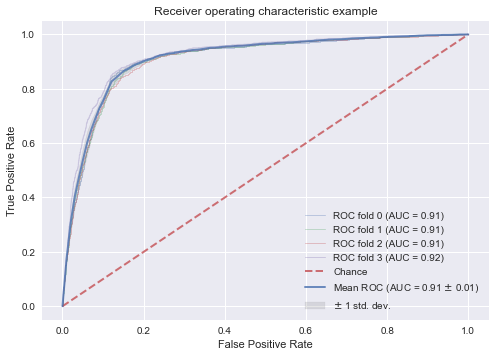

In [9]:
cv_parameter_plot(X,y,c=1.0)

In [12]:
# Randomized search on hyper parameters.
classifier = svm.SVC(kernel='rbf',class_weight='balanced',gamma='scale')
parameters = {
    'C': np.logspace(-3, 2, 6)
}
clf_cv = RandomizedSearchCV(n_iter=6, estimator=classifier, param_distributions=parameters,scoring='roc_auc', cv=4, n_jobs=4, random_state=0)

In [13]:
X = np.array(X)
y = np.array(y)
clf_cv.fit(X,y)

RandomizedSearchCV(cv=4, error_score=nan,
                   estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                                 class_weight='balanced', coef0=0.0,
                                 decision_function_shape='ovr', degree=3,
                                 gamma='scale', kernel='rbf', max_iter=-1,
                                 probability=False, random_state=None,
                                 shrinking=True, tol=0.001, verbose=False),
                   iid='deprecated', n_iter=6, n_jobs=4,
                   param_distributions={'C': array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02])},
                   pre_dispatch='2*n_jobs', random_state=0, refit=True,
                   return_train_score=False, scoring='roc_auc', verbose=0)

In [14]:
clf_cv.best_params_

{'C': 1.0}

In [15]:
clf_cv.best_score_ ## auc_roc

0.9105564444500232

The best parameter C is 1.0 for label_BaseExcess (1)

In [21]:
# For all the classification tasks: label 1-11
for i in range(1,12):
    X = train_features_all_stdscaled
    y = train_labels.iloc[:,i]
    X = np.array(X)
    y = np.array(y)
    # Randomized search on hyper parameters.
    classifier = svm.SVC(kernel='rbf',class_weight='balanced',gamma='scale')
    parameters = {
        'C': np.logspace(-3, 2, 6)
    }
    clf_cv = RandomizedSearchCV(n_iter=6, estimator=classifier, param_distributions=parameters,scoring='roc_auc', cv=4, n_jobs=4, random_state=0)
    clf_cv.fit(X,y)
    print('treating {}'.format(train_labels.columns[i]))
    display(clf_cv.best_params_)
    display(clf_cv.best_score_)
    

treating LABEL_BaseExcess


{'C': 1.0}

0.9105564444500232

treating LABEL_Fibrinogen


{'C': 0.1}

0.8065469231961806

treating LABEL_AST


{'C': 1.0}

0.7377767642331187

treating LABEL_Alkalinephos


{'C': 1.0}

0.7425756289254928

treating LABEL_Bilirubin_total


{'C': 1.0}

0.737641242502412

treating LABEL_Lactate


{'C': 1.0}

0.7987749199786518

treating LABEL_TroponinI


{'C': 0.1}

0.8772377948018993

treating LABEL_SaO2


{'C': 1.0}

0.8269416915981188

treating LABEL_Bilirubin_direct


{'C': 0.1}

0.7612375088751631

treating LABEL_EtCO2


{'C': 1.0}

0.9182983682071201

treating LABEL_Sepsis


{'C': 0.1}

0.7358024125126367

### Finish Subtask 1,2: 
The classification task is successfully achieved and the auc roc score is high overall, especially for Label_BaseExcess and Label_EtCO2

## Subtask 3: Regression of medical test results

In [22]:
# Read the pre-processed features
train_features_all_stdscaled = pd.read_csv('train_features_new_stdscaled.csv')
display(train_features_all_stdscaled.head(10))
display(train_features_all_stdscaled.shape)

0             1             2         3             4         5             6             7         8         9       10            11            12            13        14            15            16            17            18        19        20            21            22        23            24            25        26            27            28            29        30            31            32        33            34        35        36        37        38        39        40        41        42        43        44        45        46       47        48        49  ...       121       122       123       124       125       126       127       128       129       130       131       132       133       134       135       136       137       138       139       140       141       142       143       144       145       146       147       148      149       150       151       152       153       154       155       156       157       158       159       160  \
0 -1.706426  2.830411e-15  2.324755e-15 -0.645938 -2.959609e-15  1.409323 -1.261340e+00  7.834673e-01  0.258762 -0.054342  0.00000  1.067191e+00 -9.140307e-01 -6.033549e-01  0.279114  9.137925e-17 -8.090757e-01 -7.701213e-01 -5.377489e-15 -0.312045 -1.749154  2.594017e-01 -5.113706e-02 -1.949882 -1.526785e-01  2.570689e-16  0.911696  9.359181e-16  1.348791e+00 -1.911818e+00 -0.850039  7.170606e-16  4.708918e-16 -0.879550  1.521515e-01 -0.244381 -0.712007  2.153295 -0.443757  1.141957  1.659064  2.379490  2.461212  0.887842 -0.268168  0.544627  2.169672  0.08572  1.077687 -0.526560  ... -0.501834 -0.707062  4.839189  0.629175 -0.024882 -0.210959 -0.052651 -0.959996 -0.028366  2.976954  0.896924  2.300700 -0.075011 -0.037542  0.199541  1.121865  0.003711  0.044751  0.034915  0.098992  1.280418 -0.206926  1.689235  0.682784 -0.006350 -0.034472  0.020731 -0.738117  0.00834 -0.341257 -0.005901  0.007429  0.041427 -0.043963  0.129776 -0.975979  3.233922  0.537496 -1.194051 -0.071209   
1  0.542566  2.830411e-15 -6.805841e-01 -0.645938 -2.959609e-15 -1.131691  2.180274e+00  2.623457e-15  0.000000 -0.456056  0.00000 -1.201389e+00  5.967697e-03 -4.042229e-01  0.000000 -4.479802e-01  6.947351e-14 -3.613871e-02 -5.377489e-15  0.417189  1.257091 -1.576330e+00 -1.699090e+00  1.186388  4.375410e-01 -5.159906e-01  0.230741  9.359181e-16  3.772908e-15  1.985591e+00 -0.504368 -1.546813e-01 -7.124568e-01  0.623301  1.894140e-13 -0.244381  0.601186 -0.064809 -0.443757 -0.695136 -0.157824 -0.672670 -0.520244  0.467856 -0.268168  0.544627 -0.005037  0.08572 -0.630954  1.209598  ... -0.501834 -0.081749 -0.220568 -0.396019  1.342752 -0.210959 -0.052651 -0.365558 -0.028366 -0.219815 -0.398766 -0.007782 -0.075011 -0.037542 -0.332232 -0.407173  0.003711  0.044751  0.034915  0.098992 -0.273081  0.035106 -0.054242 -0.039975 -1.619583 -0.034472  0.020731  0.077597  0.00834  0.076045 -0.005901  0.008865  0.041427 -0.043963  0.129776 -0.077017 -0.111869 -0.044848 -0.643794 -0.071209   
2  0.360215  2.830411e-15 -1.132093e+00 -0.114892 -2.959609e-15  1.409323  9.954563e-01  1.152686e+00  0.000000 -1.058628  0.00000 -1.211128e-01  1.412616e-01 -2.299825e-01  0.000000  9.137925e-17  6.947351e-14 -7.054414e-02 -5.377489e-15  2.490947  0.152756 -9.644193e-01 -9.666667e-01  0.301799  6.736289e-01  2.570689e-16 -0.109736  9.359181e-16 -1.306158e+00  9.475877e-01  1.684883  7.170606e-16  4.708918e-16 -0.260729  1.894140e-13 -0.244381  0.601186  1.044243 -0.443757 -0.082772  0.750620  1.362104 -0.520244  0.887842 -0.268168  0.544627  1.082317  0.08572 -0.630954 -0.526560  ... -0.501834 -0.581999 -0.220568 -0.396019 -0.245468 -0.210959 -0.052651  0.080270 -0.028366 -0.219815 -0.398766  2.503198 -0.075011 -0.037542  0.143565 -0.407173  0.003711  0.044751  0.034915  0.098992  2.143473  0.035106 -0.054242 -0.039975  0.367372 -0.034472  0.020731  0.077597  0.00834  0.076045 -0.005901  0.008865  0.041427 -0.043963  0.129776 -0.141423 -0.111869 -0.044848  0.311583 -0.071209   
3  1.028834 -1.562042e+00  2.3

(18995, 171)

In [25]:
train_labels = pd.read_csv('train_labels.csv')
display(train_labels.iloc[:,12:].head(10))
display(train_labels.iloc[:,12:].shape) ## a total of 11 label to predict (-pid)

LABEL_RRate  LABEL_ABPm  LABEL_SpO2  LABEL_Heartrate
0         12.1        85.4       100.0             59.9
1         17.8       100.6        95.5             85.5
2         16.5        88.3        96.5            108.1
3         19.4        77.2        98.3             80.9
4         12.6        76.8        97.7             95.3
5         14.5        67.4        99.1             64.6
6         17.2        84.9        96.8             90.5
7         23.8        97.0        94.3             76.0
8         18.9        72.0        95.3             91.5
9         14.9        83.3        99.9            117.3

(18995, 4)

In [26]:
X = train_features_all_stdscaled
y = train_labels.iloc[:,12]
display(X)
display(y)

0             1             2         3             4         5         6             7         8         9   10            11            12            13        14            15            16            17            18        19        20            21        22            23            24            25        26            27            28        29        30            31            32        33            34        35        36        37        38        39        40        41        42        43        44        45        46       47        48        49  ...       121       122       123       124       125       126       127       128       129       130       131       132       133       134       135       136       137       138       139       140       141       142       143       144       145       146       147       148       149       150       151       152       153       154       155       156       157       158       159       160       161  \
0     -1.706426  2.830411e-15  2.324755e-15 -0.645938 -2.959609e-15  1.409323 -1.261340  7.834673e-01  0.258762 -0.054342  0.0  1.067191e+00 -9.140307e-01 -6.033549e-01  0.279114  9.137925e-17 -8.090757e-01 -7.701213e-01 -5.377489e-15 -0.312045 -1.749154  2.594017e-01 -0.051137 -1.949882e+00 -1.526785e-01  2.570689e-16  0.911696  9.359181e-16  1.348791e+00 -1.911818 -0.850039  7.170606e-16  4.708918e-16 -0.879550  1.521515e-01 -0.244381 -0.712007  2.153295 -0.443757  1.141957  1.659064  2.379490  2.461212  0.887842 -0.268168  0.544627  2.169672  0.08572  1.077687 -0.526560  ... -0.501834 -0.707062  4.839189  0.629175 -0.024882 -0.210959 -0.052651 -0.959996 -0.028366  2.976954  0.896924  2.300700 -0.075011 -0.037542  0.199541  1.121865  0.003711  0.044751  0.034915  0.098992  1.280418 -0.206926  1.689235  0.682784 -0.006350 -0.034472  0.020731 -0.738117  0.008340 -0.341257 -0.005901  0.007429  0.041427 -0.043963  0.129776 -0.975979  3.233922  0.537496 -1.194051 -0.071209  0.007045   
1      0.542566  2.830411e-15 -6.805841e-01 -0.645938 -2.959609e-15 -1.131691  2.180274  2.623457e-15  0.000000 -0.456056  0.0 -1.201389e+00  5.967697e-03 -4.042229e-01  0.000000 -4.479802e-01  6.947351e-14 -3.613871e-02 -5.377489e-15  0.417189  1.257091 -1.576330e+00 -1.699090  1.186388e+00  4.375410e-01 -5.159906e-01  0.230741  9.359181e-16  3.772908e-15  1.985591 -0.504368 -1.546813e-01 -7.124568e-01  0.623301  1.894140e-13 -0.244381  0.601186 -0.064809 -0.443757 -0.695136 -0.157824 -0.672670 -0.520244  0.467856 -0.268168  0.544627 -0.005037  0.08572 -0.630954  1.209598  ... -0.501834 -0.081749 -0.220568 -0.396019  1.342752 -0.210959 -0.052651 -0.365558 -0.028366 -0.219815 -0.398766 -0.007782 -0.075011 -0.037542 -0.332232 -0.407173  0.003711  0.044751  0.034915  0.098992 -0.273081  0.035106 -0.054242 -0.039975 -1.619583 -0.034472  0.020731  0.077597  0.008340  0.076045 -0.005901  0.008865  0.041427 -0.043963  0.129776 -0.077017 -0.111869 -0.044848 -0.643794 -0.071209  0.007045   
2      0.360215  2.830411e-15 -1.132093e+00 -0.114892 -2.959609e-15  1.409323  0.995456  1.152686e+00  0.000000 -1.058628  0.0 -1.211128e-01  1.412616e-01 -2.299825e-01  0.000000  9.137925e-17  6.947351e-14 -7.054414e-02 -5.377489e-15  2.490947  0.152756 -9.644193e-01 -0.966667  3.017987e-01  6.736289e-01  2.570689e-16 -0.109736  9.359181e-16 -1.306158e+00  0.947588  1.684883  7.170606e-16  4.708918e-16 -0.260729  1.894140e-13 -0.244381  0.601186  1.044243 -0.443757 -0.082772  0.750620  1.362104 -0.520244  0.887842 -0.268168  0.544627  1.082317  0.08572 -0.630954 -0.526560  ... -0.501834 -0.581999 -0.220568 -0.396019 -0.245468 -0.210959 -0.052651  0.080270 -0.028366 -0.219815 -0.398766  2.503198 -0.075011 -0.037542  0.143565 -0.407173  0.003711  0.044751  0.034915  0.098992  2.143473  0.035106 -0.054242 -0.039975  0.367372 -0.034472  0.020731  0.077597  0.008340  0.076045 -0.005901  0.008865  0.041427 -0.043963  0.129776 -0.141423 -0.111869 -0.044848  0.311583 -0.071209  0.007045   
3      1.028834 -1.562

0        12.1
1        17.8
2        16.5
3        19.4
4        12.6
         ... 
18990    17.1
18991    17.6
18992    17.3
18993    18.8
18994    18.0
Name: LABEL_RRate, Length: 18995, dtype: float64

In [27]:
X = train_features_all_stdscaled
y = train_labels.iloc[:,12]
X = np.array(X)
y = np.array(y)
# Randomized search on hyper parameters.
reg = svm.SVR(kernel='rbf',gamma='scale')
parameters = {
    'C': np.logspace(-3, 2, 6),
    'epsilon': [0, 0.01, 0.1, 0.5, 1, 2, 4]
}
reg_cv = RandomizedSearchCV(estimator=reg, param_distributions=parameters,scoring='neg_mean_absolute_error', cv=4, n_jobs=4, random_state=0)
reg_cv.fit(X,y)
print('treating {}'.format(train_labels.columns[12]))
display(reg_cv.best_params_)
display(reg_cv.best_score_)

treating LABEL_RRate


{'epsilon': 1, 'C': 1.0}

-2.014137197151963

In [32]:
for i in range(13,16):
    X = train_features_all_stdscaled
    y = train_labels.iloc[:,i]
    X = np.array(X)
    y = np.array(y)
    # Randomized search on hyper parameters.
    reg = svm.SVR(kernel='rbf',gamma='scale')
    parameters = {
        'C': np.logspace(-3, 2, 6),
        'epsilon': [0, 0.01, 0.1, 0.5, 1, 2, 4]
    }
    reg_cv = RandomizedSearchCV(estimator=reg, param_distributions=parameters,scoring='neg_mean_absolute_error', cv=4, n_jobs=4, random_state=0)
    reg_cv.fit(X,y)
    print('treating {}'.format(train_labels.columns[i]))
    display(reg_cv.best_params_)
    display(reg_cv.best_score_)

treating LABEL_ABPm


{'epsilon': 0.5, 'C': 10.0}

-6.164128067121858

treating LABEL_SpO2


{'epsilon': 1, 'C': 1.0}

-1.1247195195050943

treating LABEL_Heartrate


{'epsilon': 0.5, 'C': 10.0}

-6.851496428295319

### Successful to Finish subtask3
The subtask3 is fulfilled with acceptable (<10%) mean absolute error.
